# Bike Sharing Assignmnet

In [1]:
# Let's import required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Import and understand the data

In [2]:
# read the data
BikeSharing = pd.read_csv("E:\\New folder\\python\\py\\IIITB\\Machine Learning-1\\Linear Regression\\Bike sharing assignment\\day.csv")
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Let's get information of data
BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# statistical data
BikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning and Preparation

In [5]:
# Let's first drop unnecessary columns 

# instant can be dropped as it is only showing index
# dteday can be dropped as we already have year, month, week columns
# casual and registered can also be dropped as it is representing target variable cnt in combined way

BikeSharing.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
BikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# Let's do mapping according to data dictonary

BikeSharing['season'] = BikeSharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

BikeSharing['mnth'] = BikeSharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

BikeSharing['weekday'] = BikeSharing['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

BikeSharing['weathersit'] = BikeSharing['weathersit'].map({1:'clear', 2:'mist', 3:'light_rain', 4:'heavy_rain'})

In [7]:
BikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### EDA

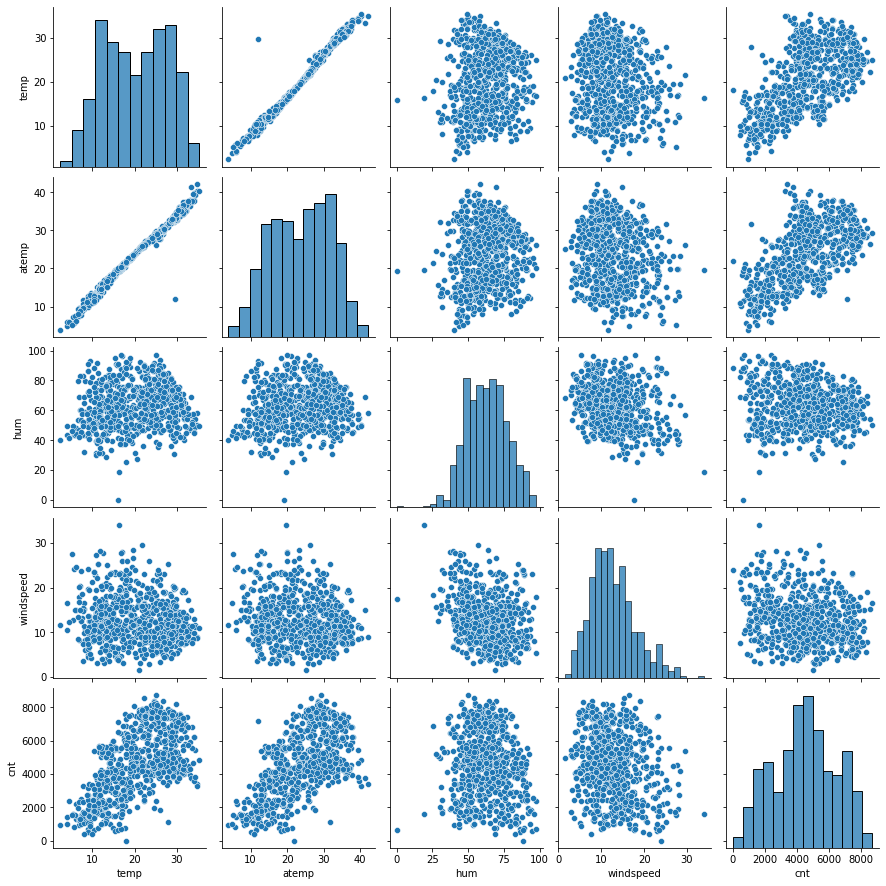

In [8]:
# Let's visualize numeric variables

sns.pairplot(BikeSharing[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

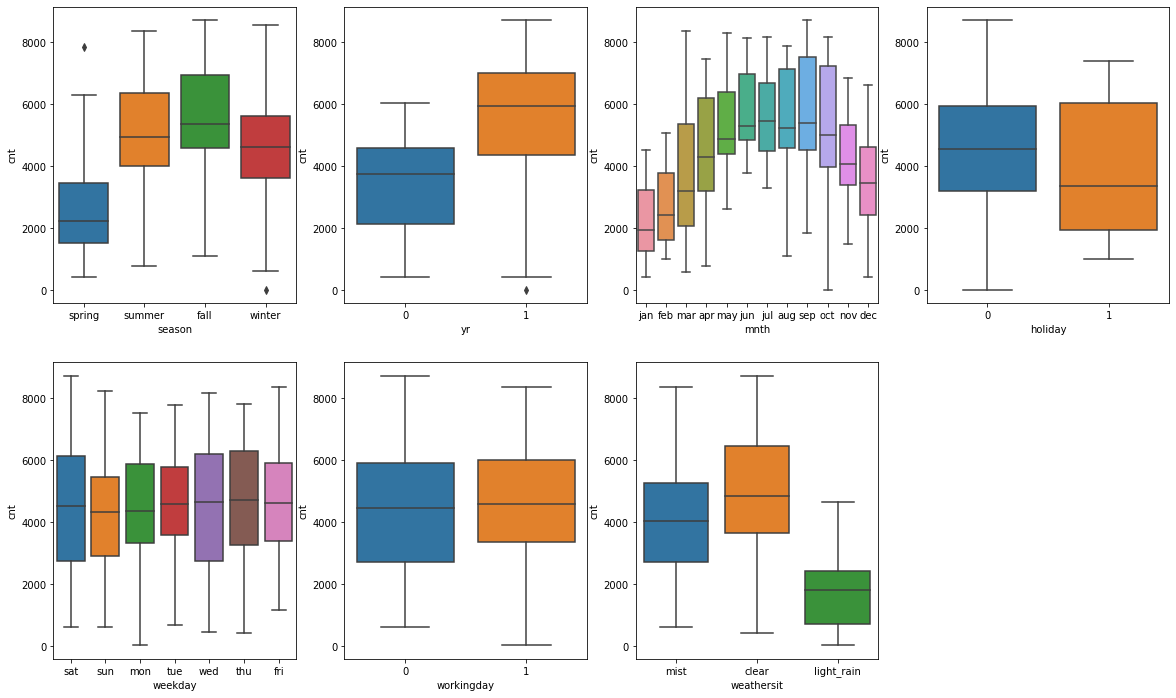

In [9]:
# Lets's visualize categorical variables

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(data=BikeSharing, x='season', y='cnt')

plt.subplot(2,4,2)
sns.boxplot(data=BikeSharing, x='yr', y='cnt')

plt.subplot(2,4,3)
sns.boxplot(data=BikeSharing, x='mnth', y='cnt')

plt.subplot(2,4,4)
sns.boxplot(data=BikeSharing, x='holiday', y='cnt')

plt.subplot(2,4,5)
sns.boxplot(data=BikeSharing, x='weekday', y='cnt')

plt.subplot(2,4,6)
sns.boxplot(data=BikeSharing, x='workingday', y='cnt')

plt.subplot(2,4,7)
sns.boxplot(data=BikeSharing, x='weathersit', y='cnt')

plt.show()

### Dummy Variables

In [10]:
# get the dummy varibales for the features

season_df = pd.get_dummies(BikeSharing['season'], drop_first=True)
month_df = pd.get_dummies(BikeSharing['mnth'], drop_first=True)
weekday_df = pd.get_dummies(BikeSharing['weekday'], drop_first=True)
weathersit_df = pd.get_dummies(BikeSharing['weathersit'], drop_first=True)

In [11]:
# let's concat dummy variables with our original dataframe

BikeSharing = pd.concat([BikeSharing, season_df, month_df, weekday_df, weathersit_df], axis=1)
BikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# let's drop duplicate columns as we already have their dummy variables.
BikeSharing.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
BikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Spitting the Data into Training and Testing Sets

In [13]:
df_train, df_test = train_test_split(BikeSharing, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescalling the Features

In [14]:
# let's rescale the features using MinMaxScaler
scaler = MinMaxScaler()

In [15]:
# apply scaler to all the columns except yes-no and dummy variables
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [16]:
# let's check the train dataframe

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

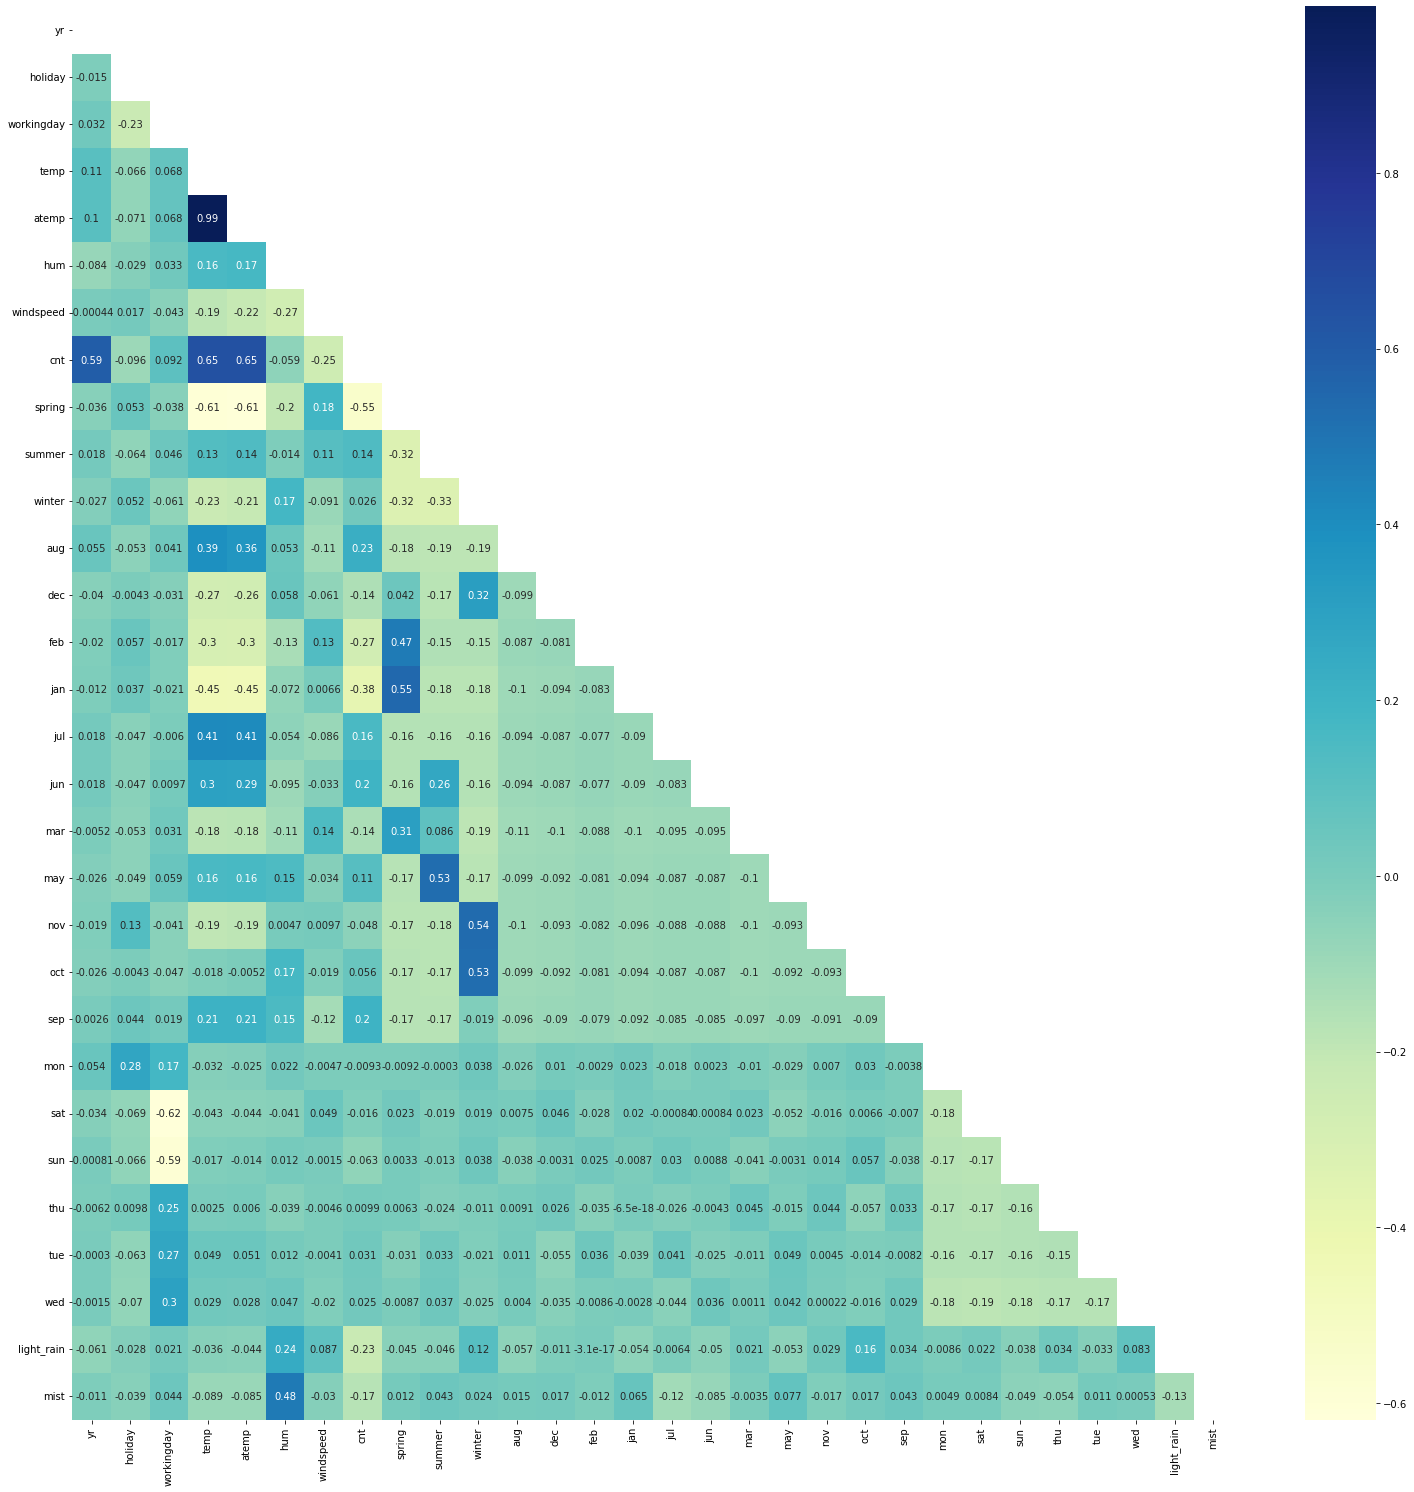

In [18]:
# Let's check the correlation of variables
plt.figure(figsize=(26,26))
mask = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu', mask=mask)
plt.show()

We can see cnt has correlation with year, temp and atemp. spring has correlation with jan and feb. winter has correlation with oct and nov

#### Dividing into X & Y Sets for the Model Building

In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

In [20]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [21]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Model Building

In [22]:
# Recursive feature elemination

# Running RFE with 15 numbers of output variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [24]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jul', 'sep', 'sat', 'sun', 'light_rain', 'mist'],
      dtype='object')


In [25]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

#### Building model using statsmodels for the detailed statistics

#### Model-1

In [26]:
# creating X_train data frame with RFE selected variables
X_train = X_train[col]

In [27]:
# adding constant variable
X_train_lm1 = sm.add_constant(X_train)

# running the linear model
lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [28]:
# Let's see the summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          2.11e-191
Time:                        22:22:15   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [29]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,workingday,50.68
11,sat,12.20
12,sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
14,mist,1.57


In [30]:
# holiday has high p-value,so it can be dropped

X_train_new = X_train.drop('holiday', axis=1)

#### Model-2

In [31]:
# adding constant variable
X_train_lm2 = sm.add_constant(X_train_new)

# running the linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [32]:
# Let's see the summary of our linear model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          2.11e-191
Time:                        22:22:15   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.0

In [33]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,sat,4.91
5,spring,4.80
11,sun,4.76
7,winter,3.69
6,summer,3.04
13,mist,2.31


In [34]:
# 'sun' has high p-value,so it can be dropped

X_train_new = X_train_new.drop('sun', axis=1)

#### Model-3

In [35]:
# adding constant variable
X_train_lm3 = sm.add_constant(X_train_new)

# running the linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [36]:
# Let's see the summary of our linear model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          1.54e-191
Time:                        22:22:17   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2307      0.036      6.472      0.0

In [37]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
5,spring,4.18
7,winter,3.39
6,summer,2.84
12,mist,2.28
0,yr,2.08
10,sat,1.84


In [38]:
# 'spring' has high p-value,so it can be dropped

X_train_new = X_train_new.drop('spring', axis=1)

#### Model-4

In [39]:
# adding constant variable
X_train_lm4 = sm.add_constant(X_train_new)

# running the linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [40]:
# Let's see the summary of our linear model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          4.14e-191
Time:                        22:22:18   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.0

In [41]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,hum,16.21
2,temp,10.36
1,workingday,4.54
4,windspeed,3.73
11,mist,2.10
0,yr,2.03
9,sat,1.79
5,summer,1.76
6,winter,1.70
7,jul,1.55


In [42]:
# 'jul' has high p-value,so it can be dropped

X_train_new = X_train_new.drop('jul', axis=1)

#### Model-5

In [43]:
# adding constant variable
X_train_lm5 = sm.add_constant(X_train_new)

# running the linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [44]:
# Let's see the summary of our linear model

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          5.10e-191
Time:                        22:22:19   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.029      5.960      0.0

In [45]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
10,mist,2.10
0,yr,2.02
8,sat,1.79
6,winter,1.66
5,summer,1.58
7,sep,1.20


In [46]:
# 'hum' has high VIF,so it can be dropped

X_train_new = X_train_new.drop('hum', axis=1)

#### Model-6

In [47]:
# adding constant variable
X_train_lm6 = sm.add_constant(X_train_new)

# running the linear model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [48]:
# Let's see the summary of our linear model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          3.13e-188
Time:                        22:22:20   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

In [49]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,sat,1.69
4,summer,1.57
9,mist,1.53
5,winter,1.40
6,sep,1.20
8,light_rain,1.08


#### We can consider Model-6 as it seems to have very low multicollinearity between the predictors and the p-values for all the predictors also seems to be significant.

## Final Model Interpretation

In [50]:
# Parameters and their coefficient values

lm6.params

const         0.075009
yr            0.233139
workingday    0.056117
temp          0.549892
windspeed    -0.155203
summer        0.088621
winter        0.130655
sep           0.097365
sat           0.067500
light_rain   -0.287090
mist         -0.080022
dtype: float64

In [51]:
# Hyothesis testing 

Null Hypothesis(H0):B1=B2=...=Bn=0
Alternate Hypothesis(H1): at least one Bi!=0

SyntaxError: invalid syntax (2927353423.py, line 3)

#### From the Model-6, we can see that all our coefficients are not equal to zero. Hence, We reject Null Hypothesis.

---

In [52]:
# F-statistic

#### F-Statistics value of 253.0 (which is greater than 1) and the p-value of 3.13e-188 i.e almost equals to zero, states that the overall model is significant.

---

### So, The equation of best fitted surface:

cnt = 0.075009 + (yr × 0.233139) + (workingday × 0.056117) + (temp × 0.549892) − (windspeed × 0.155203) + (summer × 0.088621) + (winter × 0.130655) + (sep × 0.097365) + (sat × 0.067500) − (light_rain × 0.287090) − (mist × 0.080022)

## Residual Analysis of the train data

In [53]:
#  So, now to check if the error terms are also normally distributed or not

y_train_pred = lm6.predict(X_train_lm6)

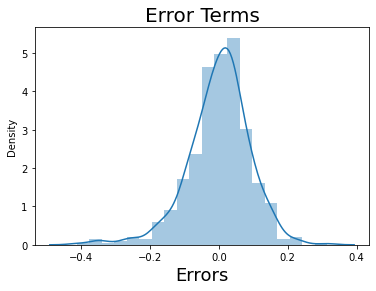

In [54]:
plt.figure()
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

#### We can see Residuals are normally distributed having mean 0.0.

## Making Predictions

In [55]:
# Applying the scaling on the test sets

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [56]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_rain,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'sep',
       'sat', 'light_rain', 'mist'],
      dtype='object')

In [59]:
# Now let's use our model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
col2 = X_train_new.columns
X_test_new = X_test[col2]

# Adding a constant variable 
X_test_lm6 = sm.add_constant(X_test_new)

In [60]:
# making prediction
y_test_pred = lm6.predict(X_test_lm6)

## Model Evaluation

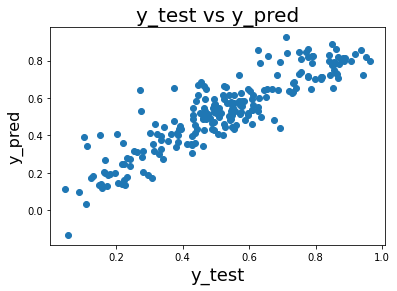

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  
plt.show()

### R-squared Value for Test

In [62]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.7961390438459764